# 💡 Predicting Medical Insurance Costs: A Deep Dive into Healthcare Data

## 🏥 Introduction  
Healthcare costs are rising globally, and understanding what drives these expenses is critical for insurance companies, policymakers, and individuals alike. In this analysis, we explore how personal attributes like age, BMI, and smoking habits impact medical insurance charges. Using machine learning models, we uncover hidden patterns and predict costs with impressive accuracy.  

**Can we predict how much you'll pay for health insurance?** Let's find out!  



## 📊 Dataset Overview  
We used the **Medical Cost Personal Dataset** containing **1,338 records** and **7 features**:  

- **age**: Age of the individual (18–64 years)  
- **sex**: Gender (`male`, `female`)  
- **bmi**: Body Mass Index (Body fat based on height and weight)  
- **children**: Number of dependents covered by insurance  
- **smoker**: Smoking status (`yes`, `no`)  
- **region**: Residential region in the U.S. (`northeast`, `northwest`, `southeast`, `southwest`)  
- **charges**: Medical insurance cost (target variable)  

🔎 **Key Observations:**  
- **No missing values!** Clean data means smoother analysis.  
- Charges ranged from $1,122 to a staggering $63,770.  



## 🔍 Exploratory Data Analysis (EDA)  

### 1️⃣ **Distribution of Numerical Features**  
- **BMI** follows a normal distribution but with some **outliers** (>50).  
- **Age** is uniformly distributed across the dataset.  
- **Charges** are **heavily skewed** with a long tail for higher costs.  

📉 **Insight:** High medical costs are rare but extreme, suggesting outliers that could distort predictions.  

### 2️⃣ **Log Transformation of Charges**  
To address the skewness, we applied a **log transformation** to the `charges` column.  

📊 **Result:**  
- Skewness reduced from **1.51** to **-0.09**—much closer to normal distribution.  
- This improves model performance by balancing the dataset.  

### 3️⃣ **Categorical Analysis**  
- **Smokers** pay significantly more than non-smokers.  
- No notable cost difference between genders.  
- **Southeast** region shows slightly higher medical costs.  

🔥 **Insight:** Smoking is a major factor in skyrocketing insurance costs.  

### 4️⃣ **Outlier Detection**  
Boxplots revealed:  
- Extreme BMI values (>50) could distort predictions.  
- Some individuals incur **extraordinary charges**, likely smokers with high BMI.  



## 🏗️ Data Preprocessing

### 🔄 **Encoding Categorical Variables**  
We used **One-Hot Encoding** for `sex`, `smoker`, and `region` to convert categorical data into numerical format.  

### 🔍 **Multicollinearity Check**  
Variance Inflation Factor (VIF) helped identify feature correlations.  

📊 **Results:**  
- **BMI** had the highest VIF (**11.36**), indicating possible multicollinearity.  
- Other features showed acceptable VIF values (<5).  

📌 **Action:** No features were removed, but this informed model selection.  

### ⚖️ **Feature Scaling**  
Standardization ensured that features like `age` and `BMI` contributed equally to model predictions.  



## 🤖 Modeling and Results  

### 1️⃣ **Linear Regression** (Baseline Model)  
Linear regression served as our benchmark.  

**Performance Metrics:**  
- **RMSE:** 0.42  
- **MAE:** 0.27  
- **R²:** 0.80  

📉 **Interpretation:**  
- The model explains **80%** of the variance.  
- However, it struggles with complex, non-linear relationships.  



### 2️⃣ **Random Forest Regressor** (With Hyperparameter Tuning)  
We tuned hyperparameters using **GridSearchCV** for better performance.  

**Best Parameters:**  
- `n_estimators`: **100**  
- `max_depth`: **10**  
- `min_samples_split`: **5**  

**Performance Metrics:**  
- **RMSE:** 0.37  
- **MAE:** 0.20  
- **R²:** 0.85  

🔎 **Insight:**  
- Random Forest significantly outperforms Linear Regression.  
- The model captures non-linear interactions, especially among smokers and high BMI individuals.  

### 3️⃣ **Cross-Validation**  
- **RMSE (CV):** 0.40 ± 0.06  
- Consistent results confirm the model generalizes well.  



## 🏆 Key Insights  

### 🚬 **Smoking**  
- The **strongest predictor** of high medical charges.  
- Smokers can pay **4x more** than non-smokers.  

### ⚖️ **BMI**  
- **High BMI** individuals (obese category) face **higher charges**, especially smokers.  

### 📈 **Age**  
- Medical costs **increase steadily with age**, reflecting greater health risks.  

### 🌎 **Region**  
- **Southeast** region residents incur higher medical costs, possibly due to lifestyle or healthcare access.  



## ✨ Conclusions  

- **Random Forest** models are more effective for predicting insurance costs than simple linear models.  
- Lifestyle factors like **smoking** and **BMI** dramatically impact healthcare expenses.  
- **Preventative health measures** could significantly reduce insurance costs.  
 

## 💻 Full Code Implementation  
Interested in diving deeper? Check out the complete code below to replicate this analysis or build upon it for further research!  


In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [40]:
# Load the dataset
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [41]:
# Dataset overview
print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head())
print("Basic info:")
df.info()
print("Number of missing values:", df.isna().sum().sum())

Dataset shape: (1338, 7)
First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Number of missing values: 0


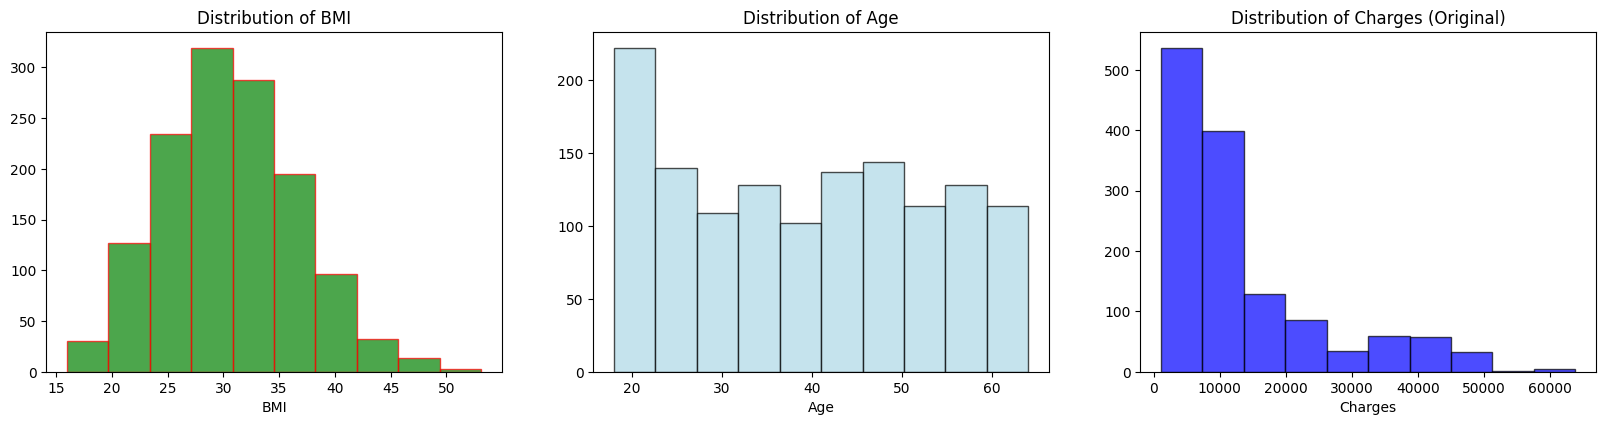

In [42]:
# --- Exploratory Data Analysis (EDA) ---
plt.figure(figsize=(20, 15))

# BMI Distribution
plt.subplot(3, 3, 1)
plt.hist(df['bmi'], color='green', edgecolor='red', alpha=0.7)
plt.xlabel('BMI')
plt.title('Distribution of BMI')

# Age Distribution
plt.subplot(3, 3, 2)
plt.hist(df['age'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.title('Distribution of Age')

# Charges Distribution
plt.subplot(3, 3, 3)
plt.hist(df['charges'], color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Charges')
plt.title('Distribution of Charges (Original)')
plt.show()

In [43]:
# Skewness
print("Skewness of variables:")
skewness = pd.DataFrame({
    'Skewness': [stats.skew(df['bmi']), stats.skew(df['age']), stats.skew(df['charges'])]
}, index=['bmi', 'age', 'charges'])
print(skewness)

Skewness of variables:
         Skewness
bmi      0.283729
age      0.055610
charges  1.514180


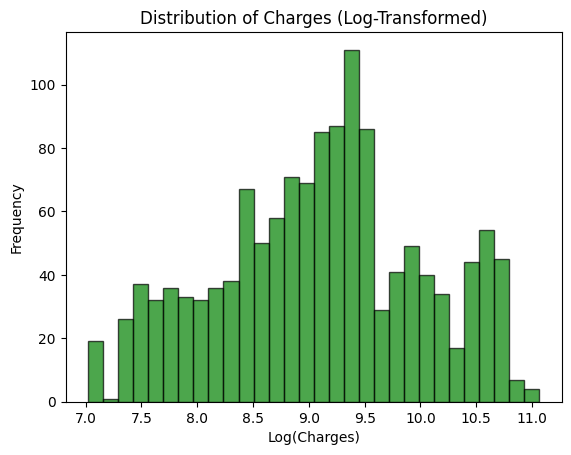

In [44]:
# Log transformation for charges
df['charges_log'] = np.log1p(df['charges'])
plt.hist(df['charges_log'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of Charges (Log-Transformed)")
plt.xlabel("Log(Charges)")
plt.ylabel("Frequency")
plt.show()

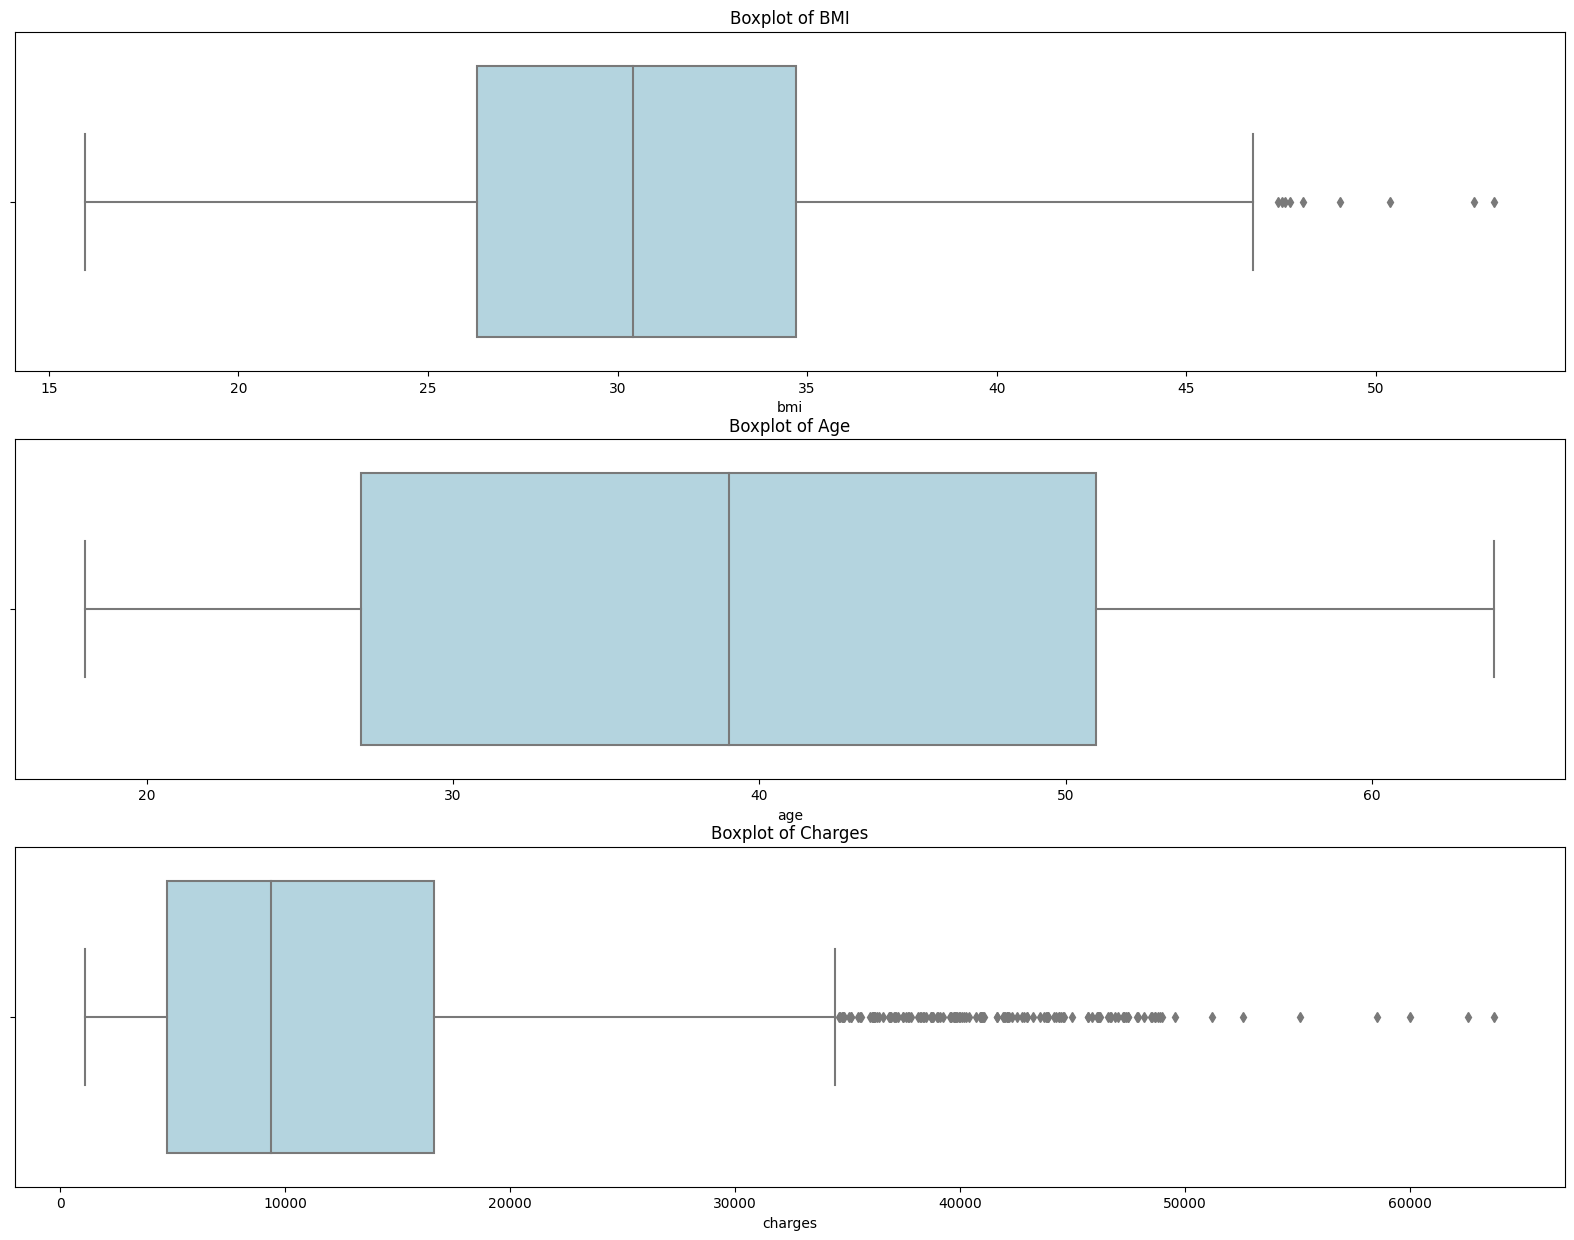

In [45]:
# --- Boxplots for Outlier Detection ---
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x=df['bmi'], color='lightblue')
plt.title('Boxplot of BMI')

plt.subplot(3, 1, 2)
sns.boxplot(x=df['age'], color='lightblue')
plt.title('Boxplot of Age')

plt.subplot(3, 1, 3)
sns.boxplot(x=df['charges'], color='lightblue')
plt.title('Boxplot of Charges')
plt.show()

In [46]:
# --- Categorical Variables ---
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

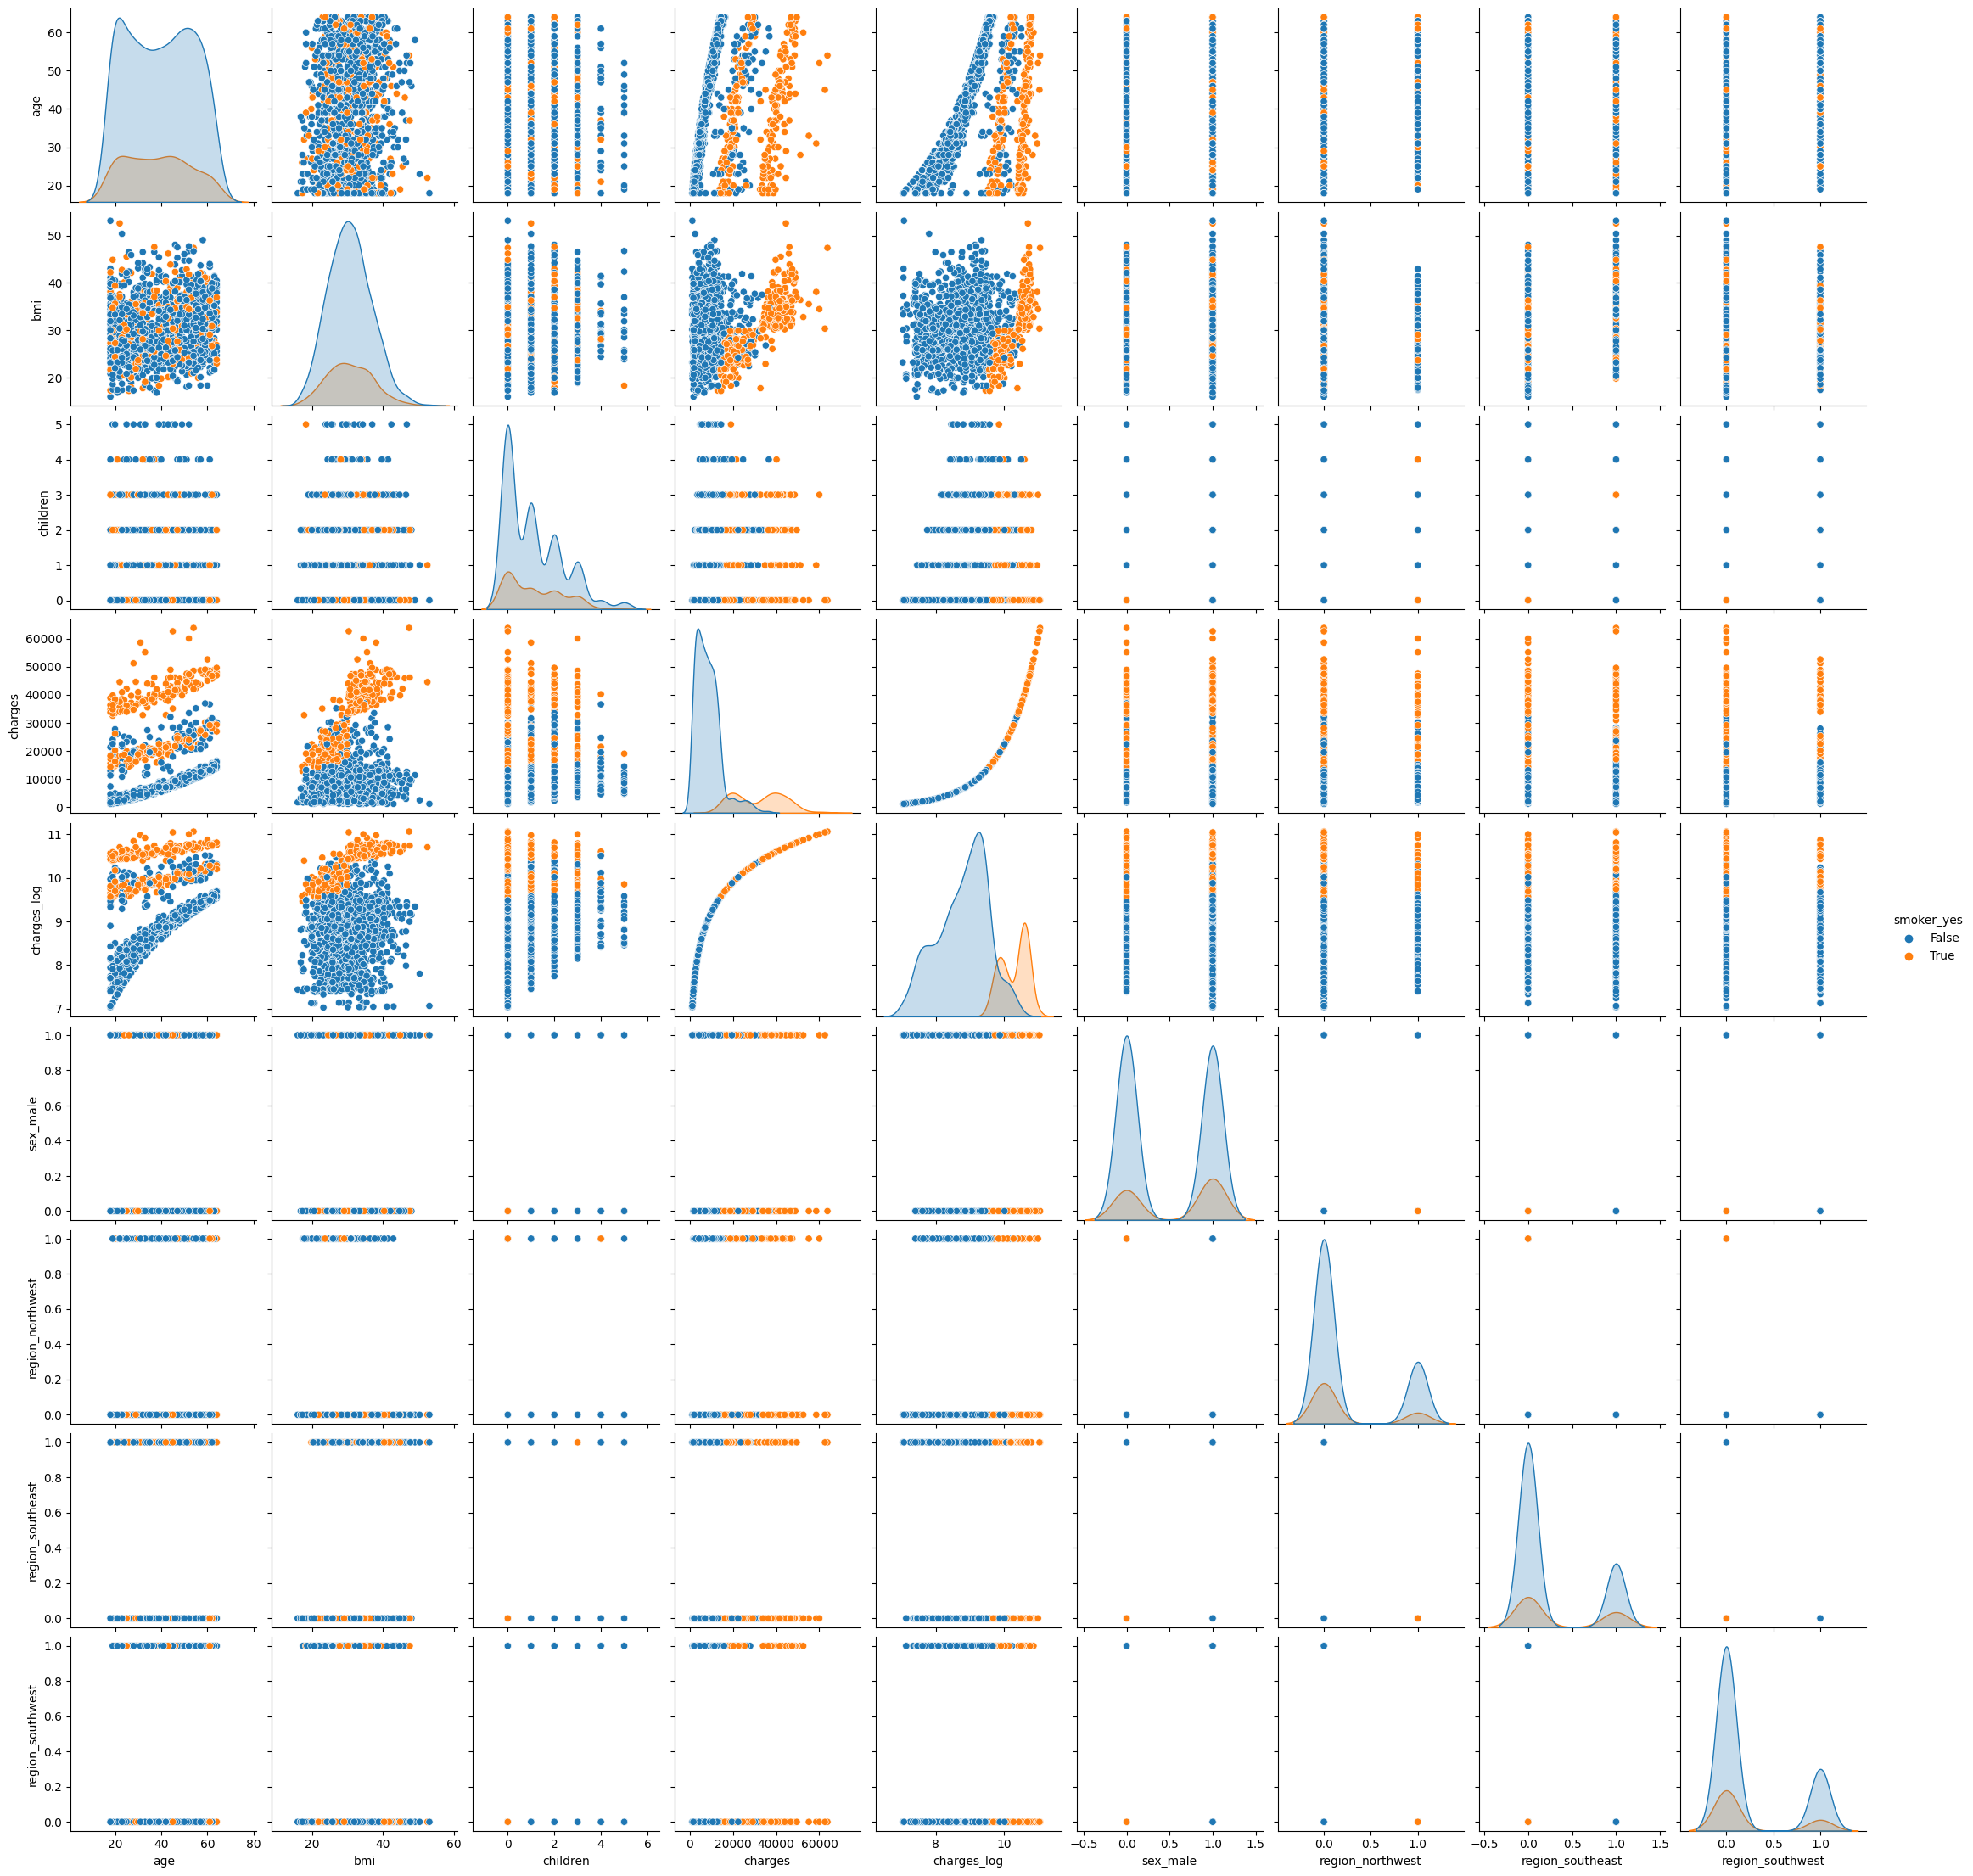

In [47]:
# Pairplot with hue for smoker
sns.pairplot(df_encoded, hue='smoker_yes')
plt.show()

In [48]:
# --- Multicollinearity Check ---
X_vif = df_encoded.drop(columns=['charges', 'charges_log'])
X_vif = X_vif.astype(float)  # Ensure all data is numeric

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

            feature        VIF
0               age   7.686965
1               bmi  11.358443
2          children   1.809930
3          sex_male   2.003185
4        smoker_yes   1.261233
5  region_northwest   1.890281
6  region_southeast   2.265564
7  region_southwest   1.960745


In [49]:
# --- Data Scaling ---
X = X_vif
y = df['charges_log']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
# --- Linear Regression Model ---
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - RMSE: 0.42, MAE: 0.27, R²: 0.80


In [52]:
# --- Random Forest with Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - RMSE: 0.37, MAE: 0.20, R²: 0.85


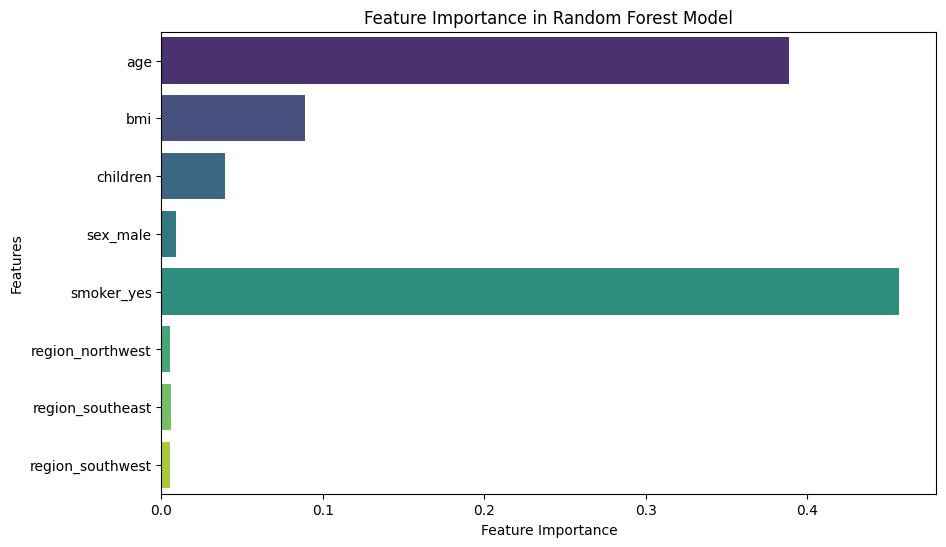

In [53]:
# --- Feature Importance ---
feature_importances = best_rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

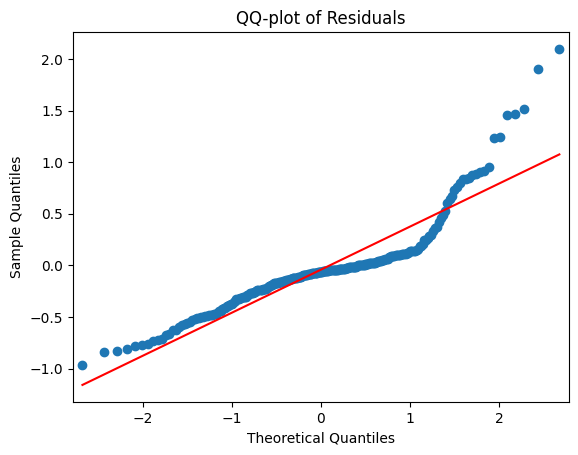

In [54]:
import statsmodels.api as sm

# Residual Analysis
residuals = y_test - y_pred_lr
sm.qqplot(residuals, line='s')
plt.title("QQ-plot of Residuals")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


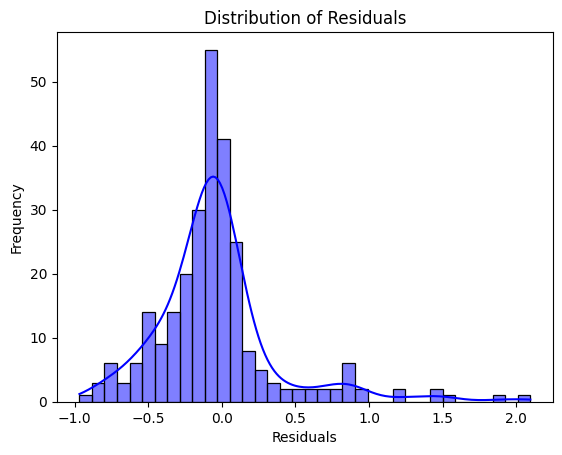

In [55]:
sns.histplot(residuals, kde=True, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)
print(f"Random Forest Cross-Validation RMSE: {cv_rmse_rf.mean():.2f} ± {cv_rmse_rf.std():.2f}")


Random Forest Cross-Validation RMSE: 0.40 ± 0.06
